<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *João Moreira Tourinho Marques*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [2]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 16.2MB/s]


In [9]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [19]:
df.head()

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801


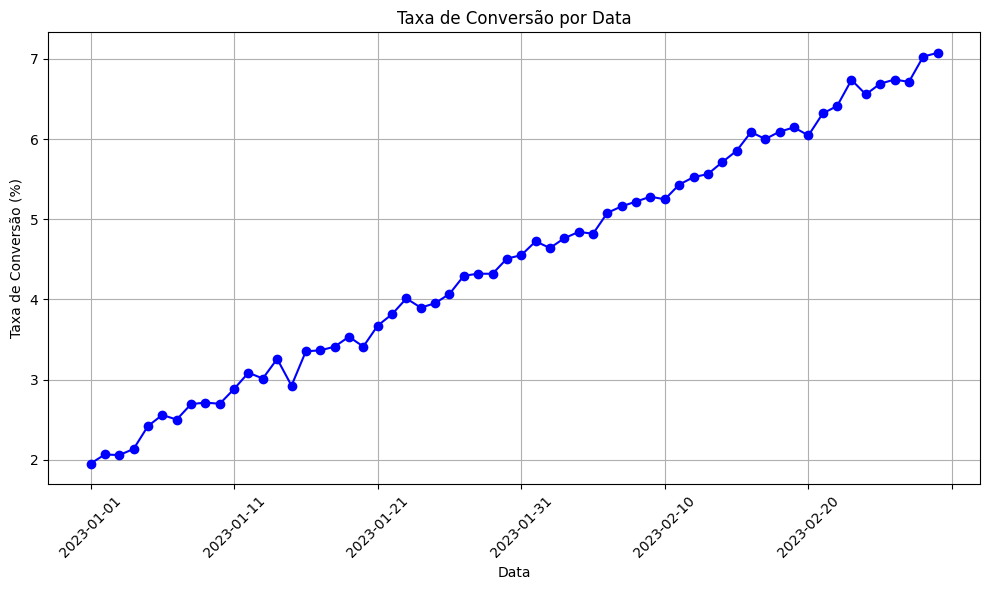

In [25]:
import matplotlib.pyplot as plt

average_pageviews = df.groupby('Data')['Taxa de Conversão (%)'].mean()

plt.figure(figsize=(10, 6))
average_pageviews.plot(kind='line', marker='o', color='b')
plt.title('Taxa de Conversão por Data')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

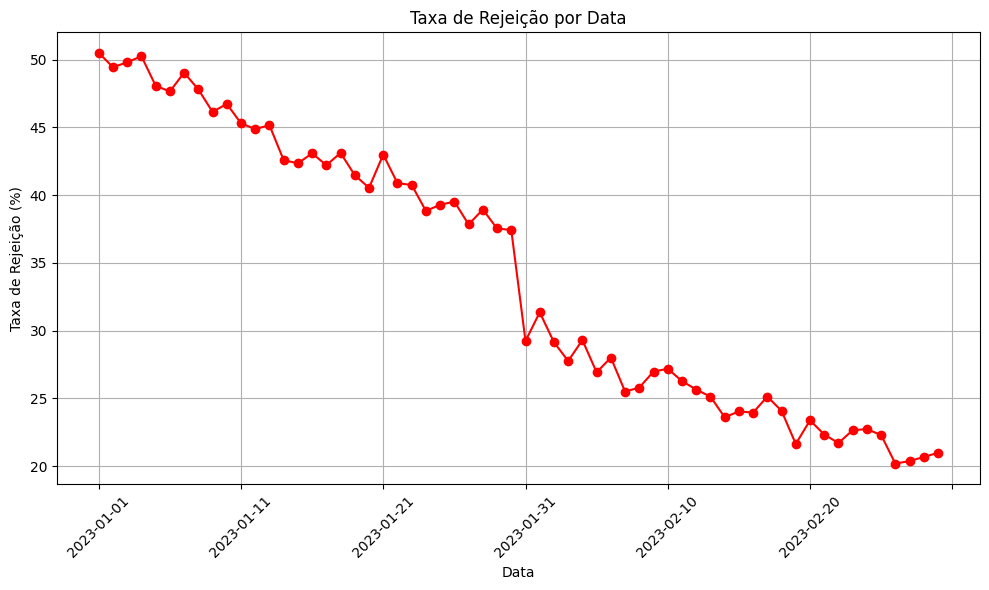

In [26]:
import matplotlib.pyplot as plt

average_pageviews = df.groupby('Data')['Taxa de Rejeição (%)'].mean()

plt.figure(figsize=(10, 6))
average_pageviews.plot(kind='line', marker='o', color='r')
plt.title('Taxa de Rejeição por Data')
plt.xlabel('Data')
plt.ylabel('Taxa de Rejeição (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

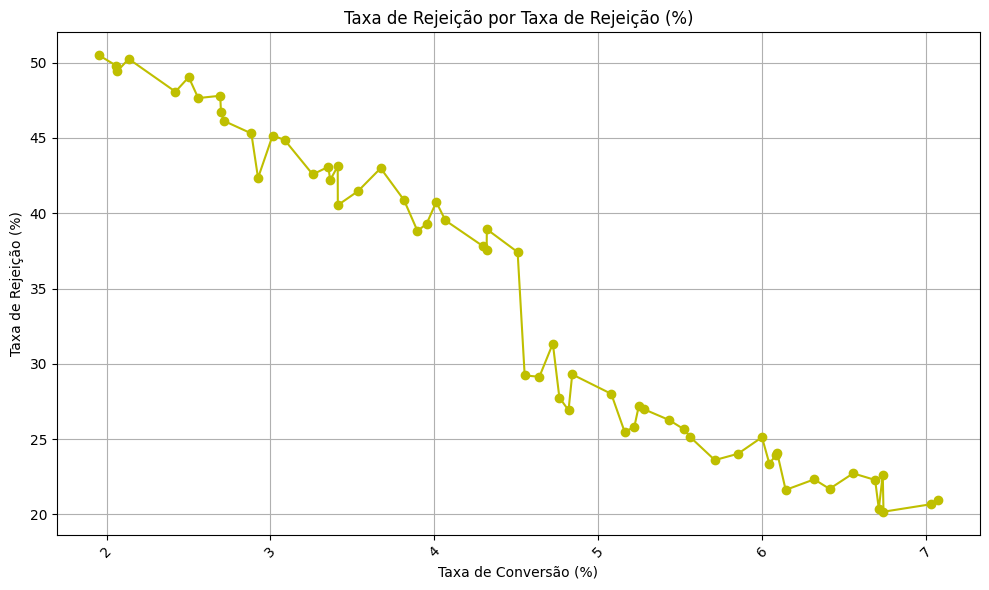

In [32]:
import matplotlib.pyplot as plt

average_pageviews = df.groupby('Taxa de Conversão (%)')['Taxa de Rejeição (%)'].mean()

plt.figure(figsize=(10, 6))
average_pageviews.plot(kind='line', marker='o', color='y')
plt.title('Taxa de Rejeição por Taxa de Rejeição (%)')
plt.xlabel('Taxa de Conversão (%)')
plt.ylabel('Taxa de Rejeição (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

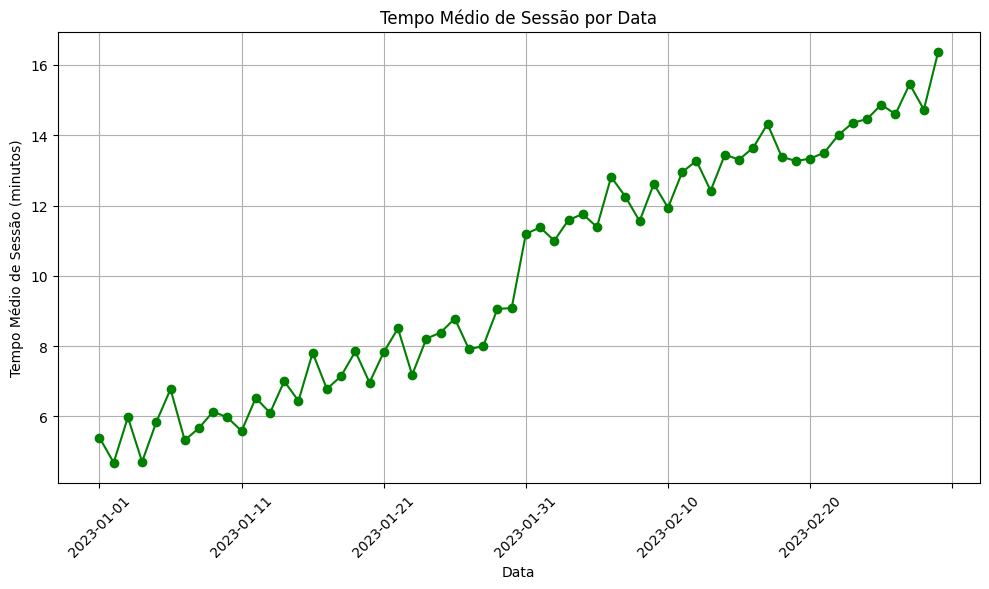

In [27]:
import matplotlib.pyplot as plt

average_pageviews = df.groupby('Data')['Tempo Médio de Sessão (minutos)'].mean()

plt.figure(figsize=(10, 6))
average_pageviews.plot(kind='line', marker='o', color='g')
plt.title('Tempo Médio de Sessão por Data')
plt.xlabel('Data')
plt.ylabel('Tempo Médio de Sessão (minutos)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

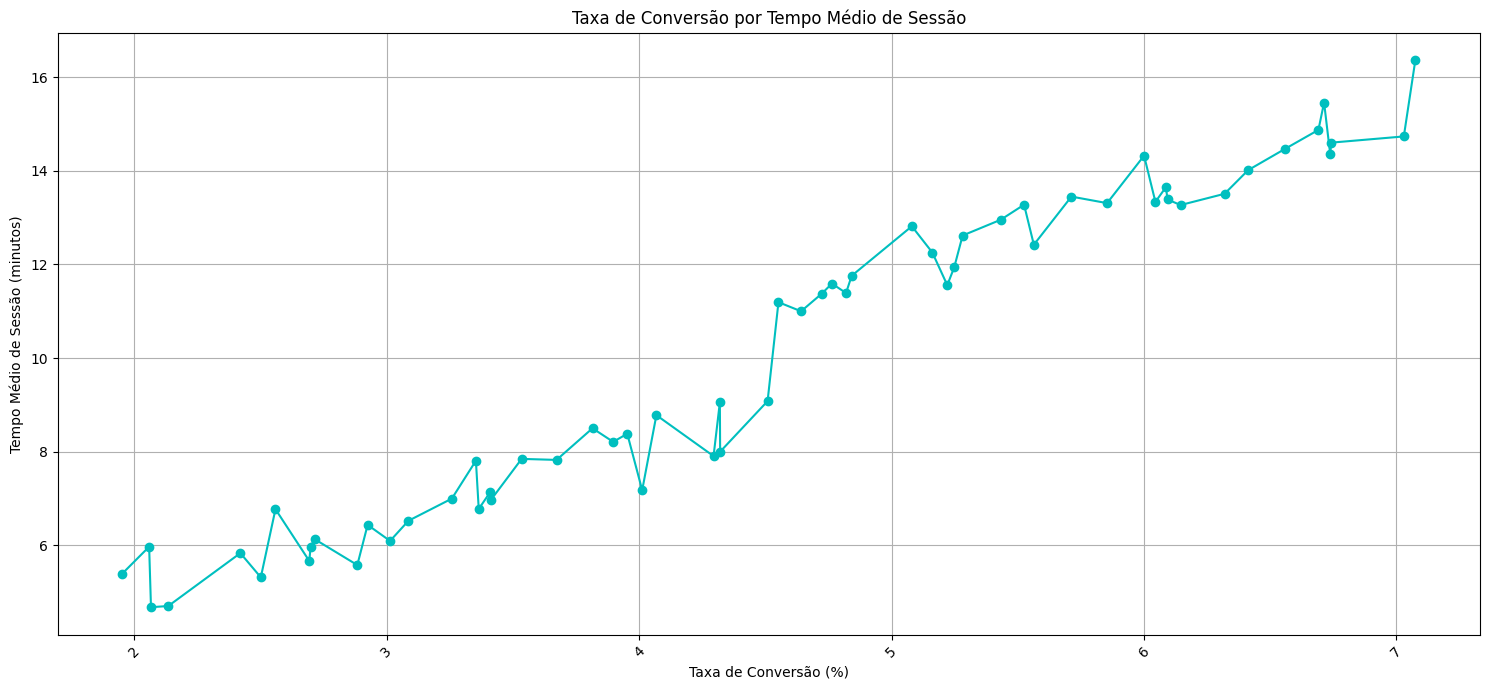

In [38]:
import matplotlib.pyplot as plt

average_pageviews = df.groupby('Taxa de Conversão (%)')['Tempo Médio de Sessão (minutos)'].mean()

plt.figure(figsize=(15, 7))
average_pageviews.plot(kind='line', marker='o', color='c')
plt.title('Taxa de Conversão por Tempo Médio de Sessão')
plt.xlabel('Taxa de Conversão (%)')
plt.ylabel('Tempo Médio de Sessão (minutos)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

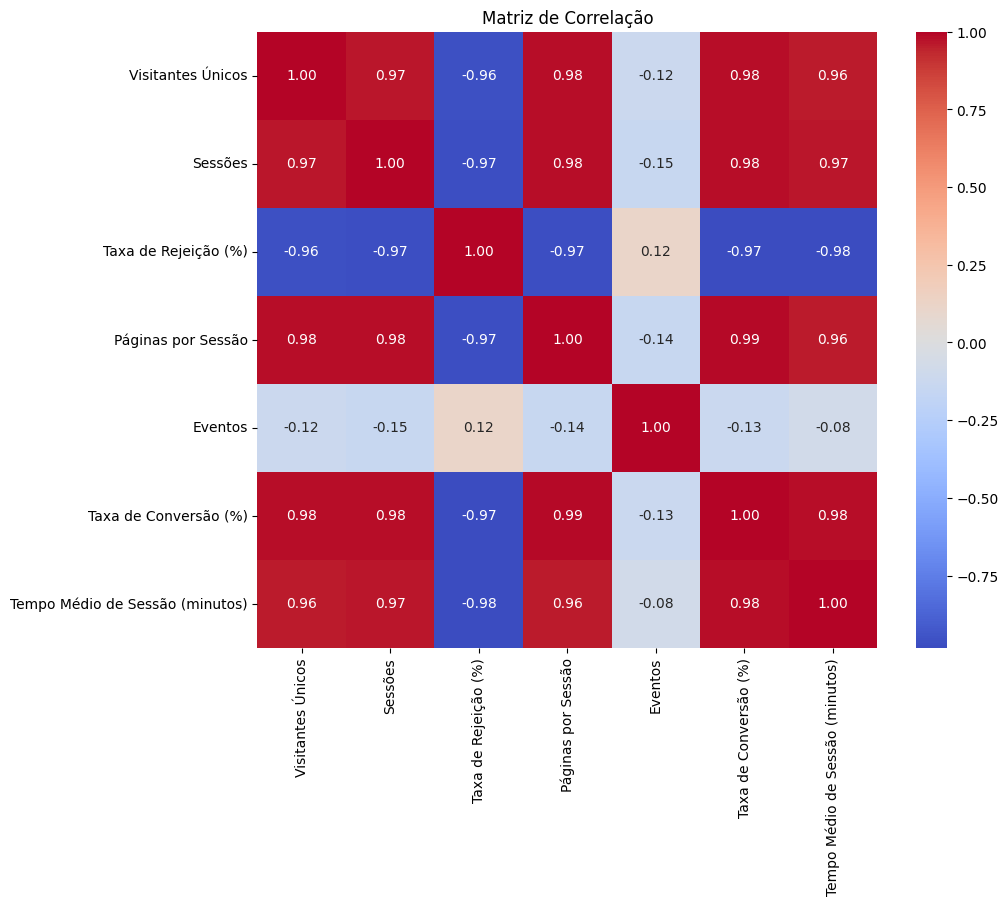

In [40]:
import numpy as np
import seaborn as sns

df_numeric = df.select_dtypes(include=[np.number])

# Calculando a matriz de correlação das colunas numéricas
corr_matrix = df_numeric.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()


### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [47]:
df_sessao = df['Tempo Médio de Sessão (minutos)']
df_sessao.head()

0    5.395516
1    4.680899
2    5.972584
3    4.705854
4    5.835801
Name: Tempo Médio de Sessão (minutos), dtype: float64

In [54]:
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [55]:
import plotly.express as px

histograma, bin_edges = np.histogram(df_sessao, bins=30)

total = len(df)
porcentagens = [count / total * 100 for count in histograma]

fig = px.bar(x=bin_edges[:-1], y=porcentagens,
             title='Distribuição Tempo Médio de Sessão (minutos) sem Outiliers',
             labels={'x': 'Tempo', 'y': 'Distribuição'},
             opacity=0.7, color_discrete_sequence=['green'])

fig.update_xaxes(type='linear', tickmode='linear', tick0=0, dtick=1)

fig.show()


In [68]:
def simulacao(valor):
    resultado = valor
    return resultado

array = np.array([5, 6, 7, 8, 9, 11, 12, 13, 14, 15])

probabilidades = np.array([0.05, 0.05, 0.10, 0.10, 0.35, 0.10, 0.10, 0.05, 0.05, 0.05])

num_simulacoes = 1000

resultados_simulacao = []

for _ in range(num_simulacoes):
    amostra = np.random.choice(array, size=3, replace=True, p=probabilidades)

    resultado_simulacao = simulacao(amostra)

    resultados_simulacao.append(resultado_simulacao)

fig = px.histogram(x=resultados_simulacao,
                   title='Histograma dos Resultados das Simulações de Monte Carlo',
                   labels={'x': 'Resultado da Simulação', 'y': 'Tempo'},
                   opacity=0.7, color_discrete_sequence=['pink'])
fig.update_layout(bargap=0.05)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1252: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1252: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1252: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [6]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.